In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
# Configuramos Pandas para mostrar solo dos decimales en los valores numéricos


In [2]:
#Ejemplo:
# Datos de ejemplo
x = [77, 18, 63, 84,34 ,59, 59, 54, 56, 36, 26, 34, 44,
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 65, 51, 62, 60, 68, 45, 65, 83, 71, 63, 58, 61]
    

In [3]:
# definimos el número de clases:
num_clases = 7

# hallamos el valor mínimo:
val_min = min(x)

# hallamos el valor máximo:
val_max = max(x)

# hallamos el ancho (amplitud) de la clase
A = (val_max - val_min) / num_clases
print(A)
# Dado que A=9.42, podemos tomar el ancho de clases igual a 10 y considerar el primer intervalo de
#clase partiendo de 16 con el fin de que el último intervalo tenga como límite superior a 86.

A= 10

9.428571428571429


In [4]:
# Inciamos la primera clase en 16.
# Definir los límites
limites = [16+ A*i for i in range(num_clases+1)]   #limites = [16,26,36,...]

In [5]:
# Crear el DataFrame con las frecuencias
df = pd.cut(x, bins=limites, include_lowest = True, right=False) # pd.cut() es una función que permite dividir los datos
                                                                    # en los diferentes límites

df = pd.value_counts(df, sort=False).reset_index()  #El parámetro sort se debe seleccionar como falso para que no ordene 
                                                   # los intervalos en orden descendente según las frecuencias, sino que 
                                                    # conserve el orden en que fueron definidos

'''Después de usar value_counts, el resultado puede tener un índice que consiste en valores distintos
del índice entero estándar o puede estar basado en una de las columnas del DataFrame. 
Usar .reset_index() devuelve el índice a la forma estándar, y permite realizar operaciones sin 
ningún inconveniente'''

df

,index,0
0,"[16, 26)",1
1,"[26, 36)",3
2,"[36, 46)",5
3,"[46, 56)",6
4,"[56, 66)",16
5,"[66, 76)",2
6,"[76, 86)",3


In [6]:
# Renombramos las columnas
df.columns = ['Intervalo','Frecuencia']

In [7]:
df

,Intervalo,Frecuencia
0,"[16, 26)",1
1,"[26, 36)",3
2,"[36, 46)",5
3,"[46, 56)",6
4,"[56, 66)",16
5,"[66, 76)",2
6,"[76, 86)",3


In [8]:
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()

In [9]:
df

,Intervalo,Frecuencia,Frecuencia acumulada
0,"[16, 26)",1,1
1,"[26, 36)",3,4
2,"[36, 46)",5,9
3,"[46, 56)",6,15
4,"[56, 66)",16,31
5,"[66, 76)",2,33
6,"[76, 86)",3,36


In [10]:
len(x)

36

In [11]:
df['Frecuencia relativa'] = df['Frecuencia'] / len(x)

In [12]:
df

,Intervalo,Frecuencia,Frecuencia acumulada,Frecuencia relativa
0,"[16, 26)",1,1,0.03
1,"[26, 36)",3,4,0.08
2,"[36, 46)",5,9,0.14
3,"[46, 56)",6,15,0.17
4,"[56, 66)",16,31,0.44
5,"[66, 76)",2,33,0.06
6,"[76, 86)",3,36,0.08


# Ejemplo: 
Considere la base de datos de los indices de peso

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

y considere la columna `Weight`.  

Calcula una tabla de frecuencias para la variable 'Weight' 
tomando como límite inferior del primer intervalo el primer cuartil Q1 y como limite superior del último intervalo el tercer cuartil  Q3 el conjunto de datos proporcionado. Considere un número de clases apropiado escogiendo un valor entre 5 y 20.

Discute los resultados y preséntalos en un gráfico.


In [13]:
data = pd.read_csv('data.csv')

In [14]:
# Calculemos el primer y el tercer cuartil

q1 = np.quantile(data['Weight'],0.25)
q3 = np.quantile(data['Weight'],0.75)
print(q3)

107.430682


In [15]:
# datos filtrados

filtered_data = data[(data['Weight']>= q1) &  (data['Weight']<= q3)]


In [16]:
# definamos el número de clases:
num_clases = 10

rango = q3 - q1

In [17]:
A = rango / num_clases

In [18]:
A

4.1957339000000005

In [19]:
limites = [q1 +A * i for i in range(num_clases+1)]

df = pd.cut(filtered_data['Weight'], bins = limites,include_lowest = True, right = False )
df= pd.value_counts(df,sort=False).reset_index()
limites

[65.473343,
 69.6690769,
 73.8648108,
 78.06054470000001,
 82.2562786,
 86.4520125,
 90.6477464,
 94.84348030000001,
 99.0392142,
 103.2349481,
 107.430682]

In [20]:
df.columns = ['Intervalo', 'Frecuencia']


#Calculamos la marca de clase:
df['Marca de clase'] = df['Intervalo'].apply(lambda x: (x.left + x.right) / 2)

# Calcular la frecuencia acumulada
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()



# Calcular la frecuencia relativa
df['Frecuencia relativa'] = df['Frecuencia'] / len(data)

# Calcular la frecuencia relativa acumulada
df['Frecuencia relativa acumulada'] = df['Frecuencia relativa'].cumsum()



# Mostrar la tabla de frecuencias
print(df)


            Intervalo  Frecuencia Marca de clase  Frecuencia acumulada  \
0    [65.473, 69.669)          81          67.57                    81   
1    [69.669, 73.865)          88          71.77                   169   
2    [73.865, 78.061)         140          75.96                   309   
3    [78.061, 82.256)         187          80.16                   496   
4    [82.256, 86.452)         142          84.35                   638   
5    [86.452, 90.648)         107          88.55                   745   
6    [90.648, 94.843)          40          92.75                   785   
7    [94.843, 99.039)          64          96.94                   849   
8   [99.039, 103.235)          83         101.14                   932   
9  [103.235, 107.431)         123         105.33                  1055   

   Frecuencia relativa  Frecuencia relativa acumulada  
0                 0.04                           0.04  
1                 0.04                           0.08  
2                

In [21]:
df

,Intervalo,Frecuencia,Marca de clase,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[65.473, 69.669)",81,67.57,81,0.04,0.04
1,"[69.669, 73.865)",88,71.77,169,0.04,0.08
2,"[73.865, 78.061)",140,75.96,309,0.07,0.15
3,"[78.061, 82.256)",187,80.16,496,0.09,0.23
4,"[82.256, 86.452)",142,84.35,638,0.07,0.30
5,"[86.452, 90.648)",107,88.55,745,0.05,0.35
6,"[90.648, 94.843)",40,92.75,785,0.02,0.37
7,"[94.843, 99.039)",64,96.94,849,0.03,0.40
8,"[99.039, 103.235)",83,101.14,932,0.04,0.44
9,"[103.235, 107.431)",123,105.33,1055,0.06,0.50


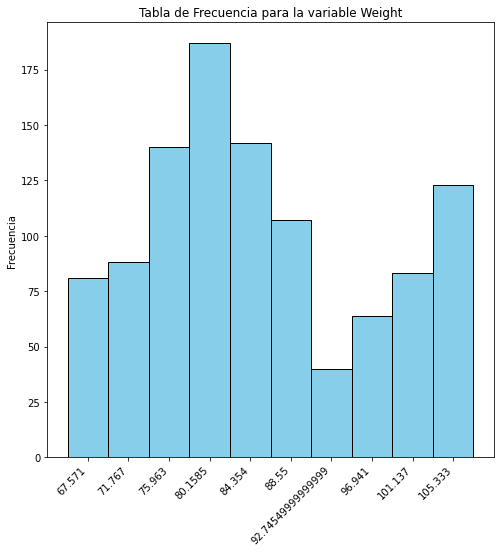

In [22]:
bins = df['Marca de clase'].tolist()
# Frecuencias para cada bin
frequencies = df['Frecuencia'].tolist()

plt.figure(figsize=(8, 8))  # tamaño del gráfico
plt.bar(bins, frequencies,width=A, edgecolor='black', align='center', color='skyblue')
plt.xticks(ticks=bins, labels=bins, rotation=45, ha='right')  # Ajustar los ticks y etiquetas
plt.title('Tabla de Frecuencia para la variable Weight')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
bins

## Diagrama de dispersión X-Y:

El diagrama de dispersión o gráfico X-Y representa los pares de datos de dos conjuntos de datos. El eje horizontal x muestra los valores del conjunto x, mientras que el eje vertical y muestra los valores correspondientes del conjunto. Opcionalmente, puedes incluir la línea de regresión y el coeficiente de correlación.

# Ejemplo: 

Considere la base datos  de Kaggle:(Obesity Levels)  

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels 

y analicemos si existe alguna relación entre la altura y el peso.

In [ ]:
df =pd.read_csv('data.csv')

In [ ]:
df.describe()

In [ ]:
# Identificamos los valores x y para gráficar el diagrama de dispersión:

x=df['Height']
y=df['Weight']

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
plt.show()

In [ ]:
#Que pasa si filtramos los datos y solo hacemos el estudio para mujeres y luego para hombres.
df_filtreded = df[df['Gender']=='Female']

In [ ]:



# Identificamos los valores x y para gráficar el diagrama de dispersión:

x=df_filtreded['Height']
y=df_filtreded['Weight']

fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
plt.show()

In [ ]:
df_filtreded_m = df[df['Gender']=='Male']
# Identificamos los valores x y para gráficar el diagrama de dispersión:

x=df_filtreded_m['Height']
y=df_filtreded_m['Weight']

fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
plt.show()

In [ ]:
#Relacion entre edad y peso
x=df['Age']
y=df['Weight']

fig, ax = plt.subplots()
ax.plot(x,y,linewidth =0,marker ='o')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
plt.show()

## Diagrama de Puntos

Un diagrama de puntos (dot plot) es útil para representar datos de manera que cada observación se mantiene distinta y visible. Se utiliza una recta numérica horizontal para ubicar los puntos que representan las observaciones individuales, apilando los puntos de observaciones idénticas o cercanas para preservar su identidad y permitir la visualización de la forma de la distribución, así como los valores extremos y acumulativos de los datos. Este tipo de diagrama es especialmente beneficioso para conjuntos de datos pequeños.

### Ejemplo: 
(Tomado de https://proclusacademy.com/blog/practical/dot-plot-python-matplotlib/)

Suppose the below list contains the heights (in inches) of 50 high school basketball players:

How frequently does each height measurement occur? We can find the answer by drawing the dot plot.

In [ ]:
hs_heights = np.array([
    71, 67, 64, 72, 65, 69, 66, 68, 69, 72, 
    69, 73, 69, 72, 73, 74, 76, 68, 66, 63, 
    67, 71, 72, 74, 68, 69, 75, 71, 72, 72, 
    65, 66, 72, 74, 66, 62, 75, 75, 64, 63, 
    64, 66, 74, 67, 72, 70, 71, 70, 74, 68
])

In [ ]:
# standard numpy and matplotlib library imports
import numpy as np
import matplotlib.pyplot as plt
 
def dotplot(input_x, **args):
 
    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts=True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)
 
    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    plt.gca().set_xticks(unique_values)

In [ ]:
dotplot(hs_heights)

In [ ]:
#Ejemplo:

datos = [96, 93, 88, 117, 127, 95, 113, 96, 108, 94, 148, 156, 139, 142, 94, 
107, 125, 155, 155, 103, 112, 127, 117, 120, 112, 135, 132, 111, 125, 104, 106, 
139, 134, 119, 97, 89, 118, 136, 125, 143, 120, 103, 113, 124, 138]

In [ ]:
import sys
import stemgraphic


In [ ]:

stemgraphic.stem_graphic(datos, scale = 10)

### Ejemplo:
Supongamos que tenemos una muestra sobre el ritmo cardíaco de 24 hombres,
las observaciones son las siguientes:

ritmo = [88, 80, 76, 72, 68, 56, 64, 60, 64, 68, 64, 68, 72, 76, 80, 84, 68, 80, 76, 72, 84, 80, 72, 76 ]

Graficar el histograma de estas observaciones ( tomar bins = 8) Realizar un diagrama de tallos y hojas Realizar un diagrama de puntos

In [ ]:
#
ritmo = [88, 80, 76, 72, 68, 56, 64, 60, 64, 68, 64, 68, 72,
         76, 80, 84, 68, 80, 76, 72, 84, 80, 72, 76 ]
#Histograma:
plt.hist(ritmo,bins=8,edgecolor= 'black')
plt.xlabel('Ritmo')
plt.ylabel('Número de hombres')
plt.show()

In [ ]:
#Diagrama de puntos

# standard numpy and matplotlib library imports
import numpy as np
import matplotlib.pyplot as plt
 
def dotplot(input_x, **args):
 
    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts=True)
    
    # Convert 1D input into 2D array
    scatter_x = [] # x values 
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)
 
    # draw dot plot using scatter() 
    plt.scatter(scatter_x, scatter_y, **args)
    
    # Optional - show all unique values on x-axis. 
    # Matplotlib might hide some of them  
    plt.gca().set_xticks(unique_values)

In [ ]:
dotplot(ritmo )

In [ ]:
import stemgraphic
stemgraphic.stem_graphic(ritmo,scale= 10)

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("data.csv")


In [ ]:
df.head(15)

In [ ]:
df['Gender'].value_counts()

In [ ]:
df['SMOKE'].value_counts()

In [ ]:
df['CALC'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

#Datos del gráfico para el diagrama de barras
frecuencias = [22,16,12,8]
categorias = ['Morado', 'Azul','Blanco','Verde']
colores = ['purple','blue', 'white', 'green']


#Crear el grafico
plt.bar(categorias,frecuencias,color = ['purple','blue', 'white', 'green'],edgecolor= 'black')
plt.title('Ventas de Bufanda')
plt.xlabel('Colores')
plt.ylabel('Cantidad')

plt.show()

In [ ]:
#Datos del gráfico para el diagrama de barras
table = df['Gender'].value_counts()

#Crear el grafico
plt.bar(table.index,table.values, width = 0.1)
plt.title('Ventas de Bufanda')
plt.xlabel('Colores')
plt.ylabel('Cantidad')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el DataFrame cargado como 'df'
# Si aún no has cargado el archivo, primero carga el DataFrame usando pd.read_csv o el método adecuado para tu archivo.

# Crear la tabla de frecuencia para la variable 'Gender'
frequency_table = df['Gender'].value_counts()

# Generar el diagrama de barras
plt.figure(figsize=(8, 6))
frequency_table.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Alinear etiquetas en el eje X
plt.show()


In [ ]:
tabla_Gender = df['Gender'].value_counts()
print(tabla_Gender)

In [ ]:
# Creamos el grafico
plt.bar(tabla_Gender.index,tabla_Gender.values, color= ['blue','red'])
plt.show()

In [ ]:
frecuencias = [22,16,12,8]
categorias = ['Morado', 'Azul','Blanco','Verde']
colores = ['purple','blue', 'white', 'green']

#Creamos el diagrama circular
plt.pie(frecuencias,labels = categorias,autopct = '%1.1f%%',colors = colores, wedgeprops = {"edgecolor" : "red", 
                      'linewidth': 2})
plt.title('Ventas de Bufanda')

plt.show()

In [ ]:
tabla_Gender = df['Gender'].value_counts()


In [ ]:
tabla_Gender

In [ ]:
plt.pie(tabla_Gender,labels =['Hombres', 'Mujeres'], autopct = '%1.1f%%')
plt.title('Genero')
plt.show()